

## DNN Example for Fashion MNIST Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Save original for visualization
x_train_raw = x_train.copy()
x_test_raw = x_test.copy()


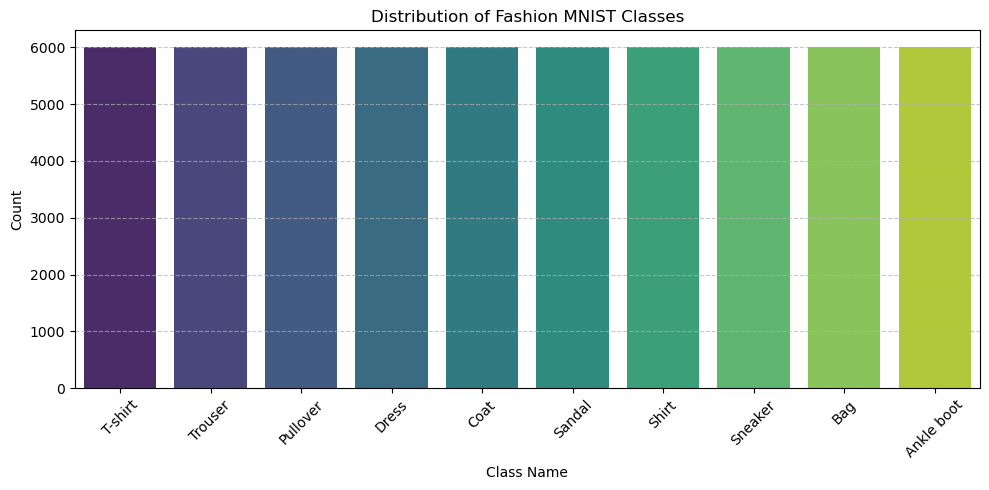

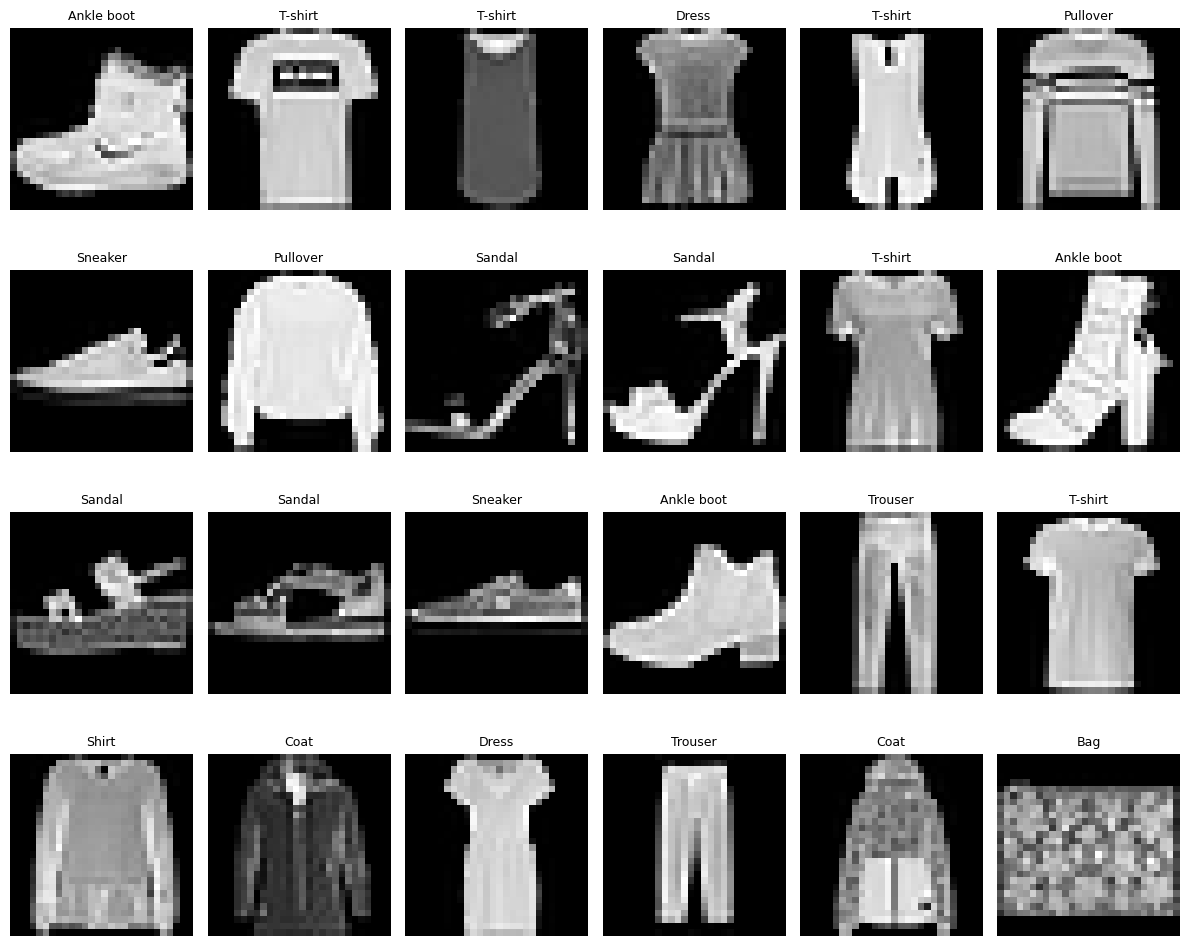

In [22]:
# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    label_series = pd.Series(labels)
    sns.countplot(x=label_series, palette="viridis")
    plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=4, cols=6):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train_raw, y_train, class_names)


In [26]:
# Save original for visualization
x_train_raw = x_train.copy()
x_test_raw = x_test.copy()

# Normalize
x_train = x_train_raw / 255.0
x_test = x_test_raw / 255.0

# Flatten for feeding into DNN
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


In [27]:
def create_model():
    initializer = tf.keras.initializers.HeNormal()

    model = models.Sequential([
        layers.Input(shape=(784,)),

        layers.Dense(1024, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(512, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(256, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    return model


In [28]:
model = create_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,508,938 (5.76 MB)

 Trainable params: 1,505,354 (5.74 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [34]:
# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=3, verbose=1, min_lr=1e-5
)

# Early stopping (optional)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Train the model
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=128,
                    callbacks=[lr_scheduler, early_stop],
                    verbose=2)


Epoch 1/50
375/375 - 17s - 45ms/step - accuracy: 0.9402 - loss: 0.1589 - val_accuracy: 0.9032 - val_loss: 0.2934 - learning_rate: 2.5000e-04
Epoch 2/50
375/375 - 17s - 45ms/step - accuracy: 0.9439 - loss: 0.1492 - val_accuracy: 0.9034 - val_loss: 0.2968 - learning_rate: 2.5000e-04
Epoch 3/50
375/375 - 16s - 42ms/step - accuracy: 0.9457 - loss: 0.1449 - val_accuracy: 0.9033 - val_loss: 0.3097 - learning_rate: 2.5000e-04
Epoch 4/50
375/375 - 18s - 48ms/step - accuracy: 0.9476 - loss: 0.1395 - val_accuracy: 0.9035 - val_loss: 0.3028 - learning_rate: 2.5000e-04
Epoch 5/50
375/375 - 16s - 43ms/step - accuracy: 0.9477 - loss: 0.1377 - val_accuracy: 0.9038 - val_loss: 0.3081 - learning_rate: 2.5000e-04
Epoch 6/50
375/375 - 18s - 47ms/step - accuracy: 0.9514 - loss: 0.1293 - val_accuracy: 0.9007 - val_loss: 0.3323 - learning_rate: 2.5000e-04


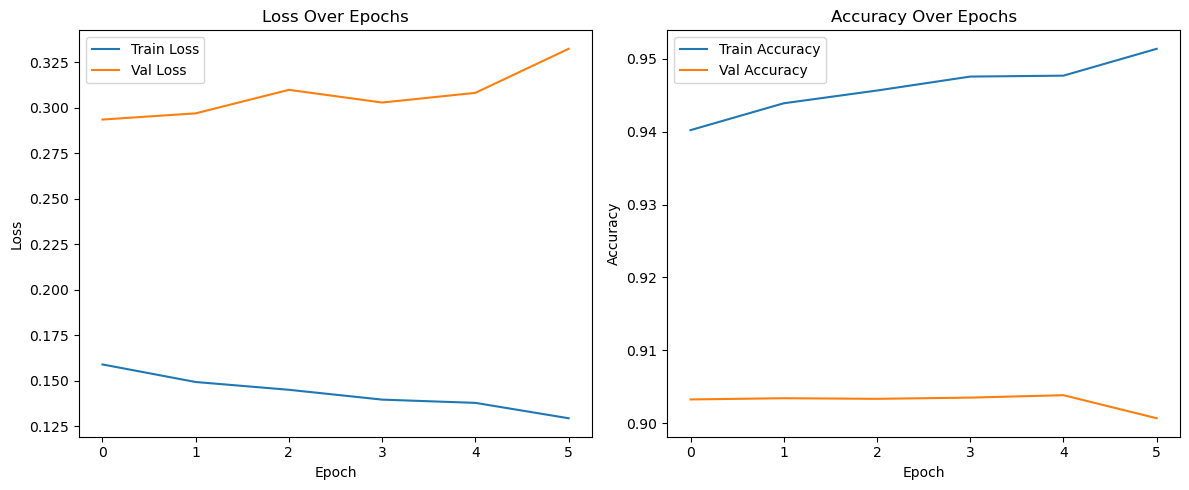

In [35]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.8983


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


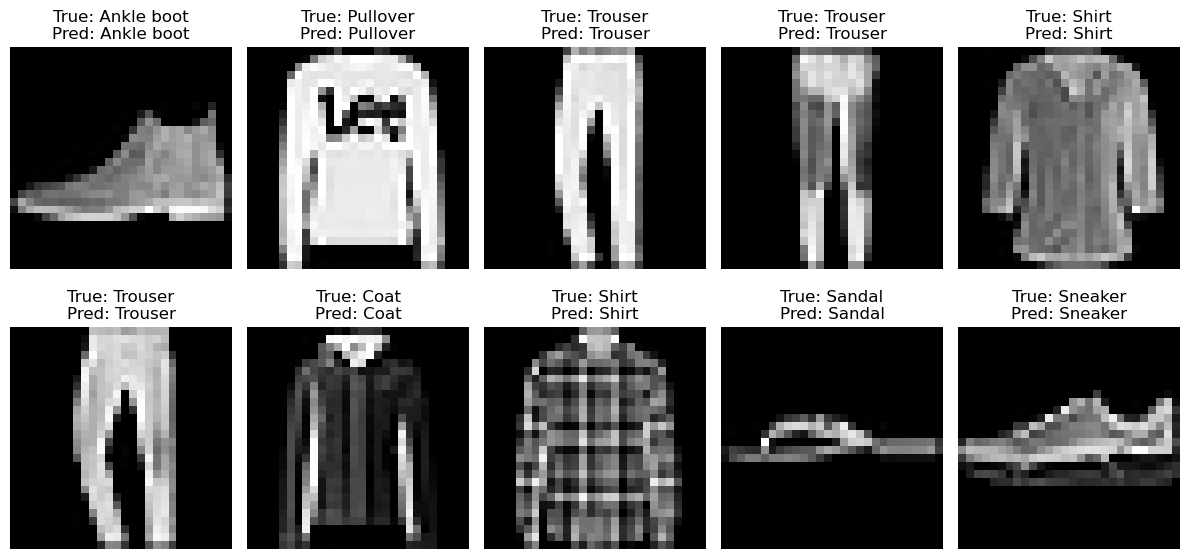

In [37]:
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)


## ResNet (DNN) Example for Fashion MNIST Dataset

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [52]:
 #Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

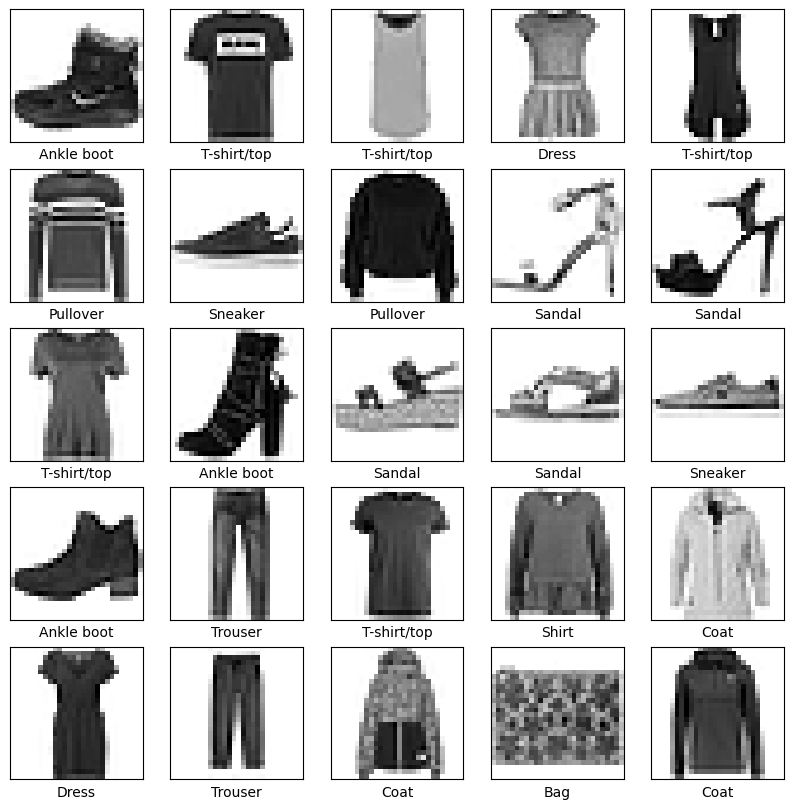

In [53]:
# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [55]:
 #Improved ResNet-style DNN Model (with batch norm and dropout)
def create_resnet_dnn_improved():
    inputs = Input(shape=(784,))
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x1 = Dense(256, activation='relu')(x)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.3)(x1)
    x2 = Dense(256, activation='relu')(x1)
    x2 = BatchNormalization()(x2)
    res1 = Add()([x, x2])
    res1 = Activation('relu')(res1)

    x3 = Dense(128, activation='relu')(res1)
    x3 = BatchNormalization()(x3)
    x3 = Dropout(0.3)(x3)
    x4 = Dense(128, activation='relu')(x3)
    x4 = BatchNormalization()(x4)
    res1_down = Dense(128, activation='relu')(res1)
    res1_down = BatchNormalization()(res1_down)
    res2 = Add()([res1_down, x4])
    res2 = Activation('relu')(res2)

    x_final = Dense(64, activation='relu')(res2)
    x_final = Dropout(0.3)(x_final)
    outputs = Dense(10, activation='softmax')(x_final)

    return Model(inputs, outputs)


In [62]:
# Compile and train model
resnet_model = create_resnet_dnn_improved()
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=2, verbose=1)
]

resnet_history = resnet_model.fit(
    x_train_flat, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/50
375/375 - 28s - 75ms/step - accuracy: 0.7468 - loss: 0.7269 - val_accuracy: 0.8227 - val_loss: 0.4857 - learning_rate: 0.0010
Epoch 2/50
375/375 - 7s - 19ms/step - accuracy: 0.8307 - loss: 0.4761 - val_accuracy: 0.8535 - val_loss: 0.4078 - learning_rate: 0.0010
Epoch 3/50
375/375 - 7s - 19ms/step - accuracy: 0.8452 - loss: 0.4318 - val_accuracy: 0.8312 - val_loss: 0.4650 - learning_rate: 0.0010
Epoch 4/50
375/375 - 7s - 19ms/step - accuracy: 0.8524 - loss: 0.4131 - val_accuracy: 0.8604 - val_loss: 0.3888 - learning_rate: 0.0010
Epoch 5/50
375/375 - 7s - 19ms/step - accuracy: 0.8599 - loss: 0.3932 - val_accuracy: 0.8658 - val_loss: 0.3631 - learning_rate: 0.0010
Epoch 6/50
375/375 - 7s - 19ms/step - accuracy: 0.8621 - loss: 0.3826 - val_accuracy: 0.8453 - val_loss: 0.4277 - learning_rate: 0.0010
Epoch 7/50
375/375 - 10s - 28ms/step - accuracy: 0.8652 - loss: 0.3749 - val_accuracy: 0.8732 - val_loss: 0.3551 - learning_rate: 0.0010
Epoch 8/50
375/375 - 7s - 19ms/step - accuracy

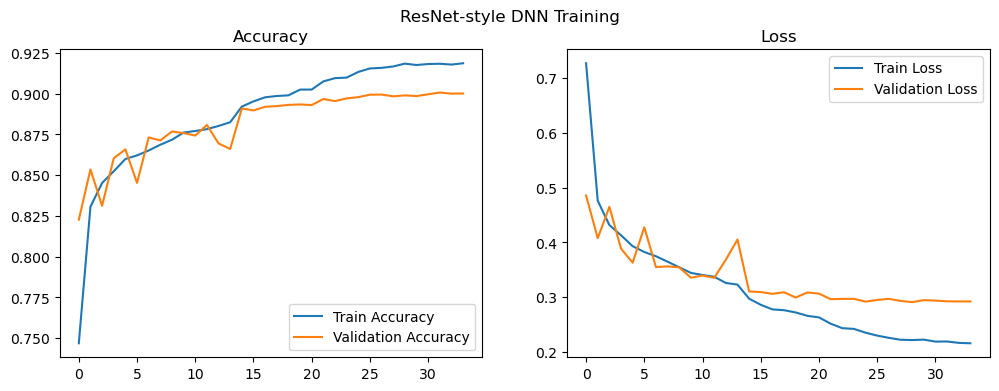

In [63]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(resnet_history, 'ResNet-style DNN Training')

In [64]:
# Evaluate on test set
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")


ResNet-style DNN Test Accuracy: 0.8951



ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


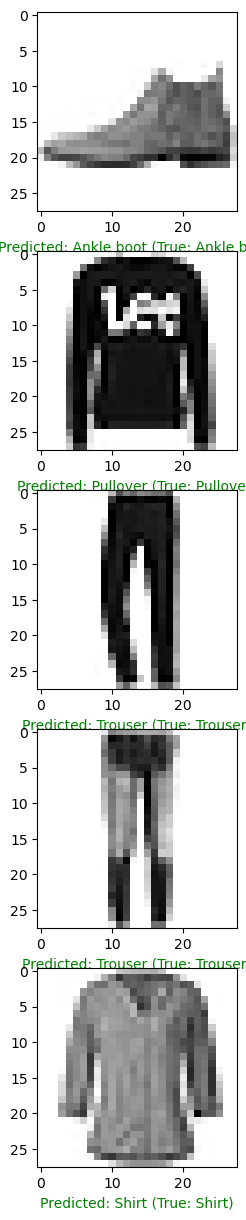

In [65]:
 #Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)
